In [ ]:
!pip install tensorflow keras numpy pandas sklearn matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
import numpy as np

def load_glove_embeddings(glove_path):
    embeddings_index = {}
    with open(glove_path, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs
    return embeddings_index

# Make sure the file path matches where it's uploaded in Colab
glove_path = "/content/glove.6B.100d.txt"  # Change this if needed
embeddings_index = load_glove_embeddings(glove_path)
print(f"Loaded {len(embeddings_index)} word vectors.")

Loaded 393968 word vectors.


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load dataset (only top 10,000 words to keep vocab manageable)
vocab_size = 10000
max_length = 100  # Max words per review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences so all reviews have the same length
x_train = pad_sequences(x_train, maxlen=max_length, padding="post", truncating="post")
x_test = pad_sequences(x_test, maxlen=max_length, padding="post", truncating="post")

print(f"Training samples: {len(x_train)}, Testing samples: {len(x_test)}")

Training samples: 25000, Testing samples: 25000


In [10]:
embedding_dim = 100  # Since we loaded 100d GloVe vectors

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

word_index = imdb.get_word_index()
for word, i in word_index.items():
    if i < vocab_size:  # Only consider words in our vocab limit
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Embedding matrix shape: (10000, 100)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Define model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    Conv1D(filters=128, kernel_size=5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification (positive/negative sentiment)
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [12]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 121ms/step - accuracy: 0.5077 - loss: 0.7075 - val_accuracy: 0.5303 - val_loss: 0.6914
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.5346 - loss: 0.6895 - val_accuracy: 0.5930 - val_loss: 0.6730
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 120ms/step - accuracy: 0.5945 - loss: 0.6628 - val_accuracy: 0.6336 - val_loss: 0.6341
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 44s 137ms/step - accuracy: 0.6771 - loss: 0.6013 - val_accuracy: 0.6763 - val_loss: 0.5913
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.7352 - loss: 0.5334 - val_accuracy: 0.6998 - val_loss: 0.5623


In [13]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6970 - loss: 0.5646
Test Accuracy: 0.6998


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71     12500
           1       0.71      0.67      0.69     12500

    accuracy                           0.70     25000
   macro avg       0.70      0.70      0.70     25000
weighted avg       0.70      0.70      0.70     25000



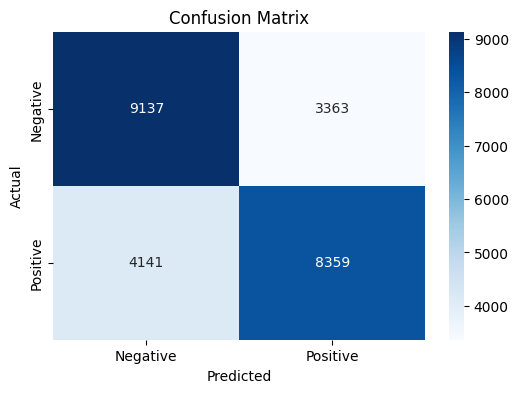

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions
y_pred_probs = model.predict(x_test)  # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary labels

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    Conv1D(filters=256, kernel_size=5, activation='relu'),  # More filters
    Conv1D(filters=128, kernel_size=3, activation='relu'),  # Smaller kernel
    GlobalMaxPooling1D(),
    Dense(256, activation='relu'),  # Bigger dense layer
    Dropout(0.5),  # Keep dropout to avoid overfitting
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [23]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,  # Adjust based on performance
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.5510 - loss: 0.6851 - val_accuracy: 0.5962 - val_loss: 0.6539
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 116ms/step - accuracy: 0.6380 - loss: 0.6256 - val_accuracy: 0.6359 - val_loss: 0.6139
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.7010 - loss: 0.5590 - val_accuracy: 0.6489 - val_loss: 0.6170
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 144ms/step - accuracy: 0.7368 - loss: 0.5186 - val_accuracy: 0.6541 - val_loss: 0.6365
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 138ms/step - accuracy: 0.7827 - loss: 0.4486 - val_accuracy: 0.6783 - val_loss: 0.6185
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 115ms/step - accuracy: 0.8358 - loss: 0.3658 - val_accuracy: 0.6551 - val_loss: 0.6832
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 160s 138ms/step - accuracy: 0.8765 - loss: 0.2921 - val_accuracy: 0.6669 - val_loss: 0.7693
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 164ms/step - accuracy: 0.9131 - l

In [24]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6693 - loss: 1.1975
Test Accuracy: 0.6688


782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     12500
           1       0.67      0.67      0.67     12500

    accuracy                           0.67     25000
   macro avg       0.67      0.67      0.67     25000
weighted avg       0.67      0.67      0.67     25000



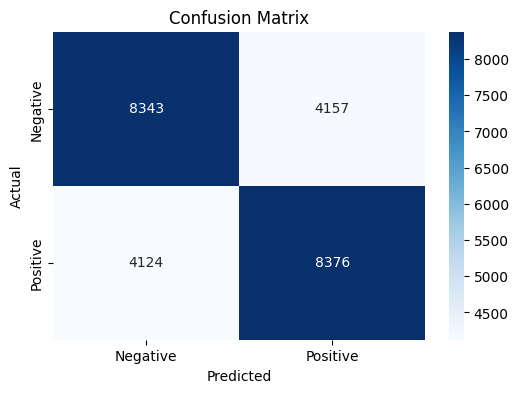

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions
y_pred_probs = model.predict(x_test)  # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary labels

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

# Load dataset
vocab_size = 10000
max_length = 100
(x_data, y_data), (_, _) = imdb.load_data(num_words=vocab_size)  # Load all data (ignore default split)

# Pad sequences
x_data = pad_sequences(x_data, maxlen=max_length, padding="post", truncating="post")

# Split into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print(f"New Split - Training samples: {len(x_train)}, Testing samples: {len(x_test)}")


New Split - Training samples: 20000, Testing samples: 5000


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Build model
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate (0.0005)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs (30 epochs)
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.6004 - loss: 0.6520 - val_accuracy: 0.7980 - val_loss: 0.4308
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.8555 - loss: 0.3418 - val_accuracy: 0.8248 - val_loss: 0.3811
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9458 - loss: 0.1671 - val_accuracy: 0.8314 - val_loss: 0.4159
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.9907 - loss: 0.0545 - val_accuracy: 0.8300 - val_loss: 0.4984
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9996 - loss: 0.0126 - val_accuracy: 0.8330 - val_loss: 0.5827
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8330 - val_loss: 0.6502
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8326 - val_loss: 0.7072
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 1.0000 - loss: 7.9020e-04 - val_acc

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2437
           1       0.83      0.84      0.84      2563

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



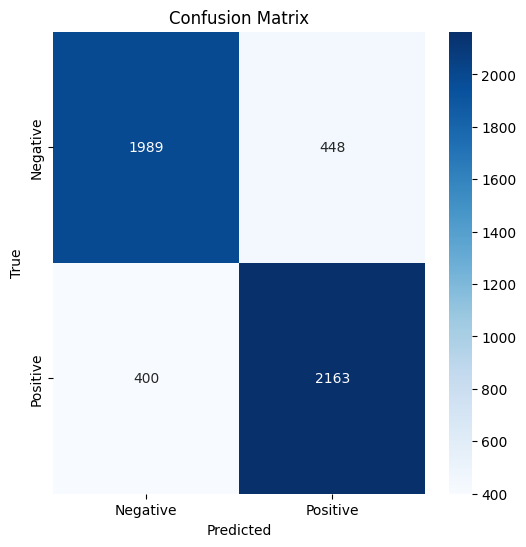

In [32]:
# Predict the labels on the test set
y_pred = model.predict(x_test)

# Convert predictions to binary (0 or 1)
y_pred = (y_pred > 0.5)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()